<a href="https://colab.research.google.com/github/priscilahagunda/Machine-Learning-Labs/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
import io
import csv
from google.colab import files


Adding the CSV files

# Get the Dataset

In [224]:
upload = files.upload()
data = pd.read_csv(io.BytesIO(upload['modified_data.csv']))

Saving modified_data.csv to modified_data (4).csv


Number of rows


In [225]:
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [226]:
data.shape

(1460, 77)

In [227]:
data.drop('Id',inplace=True,axis=1)

In [228]:
data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [229]:
original_features=list(data.columns)
len(original_features)

76

In [230]:
features_missing_values=list(data.columns[data.isna().any()])
len(features_missing_values)

15

In [231]:
len(data)

1460

# Fill in Missing Features

In [232]:
bfill,mean_fill=[],[]

In [233]:
for feature in features_missing_values:
  print(feature,' ',data[feature].isna().sum()/len(data)*100,' ',data[feature].dtype)
  if data[feature].dtype=='float64':
    mean_fill.append(feature)
  else:
    bfill.append(feature)

LotFrontage   17.73972602739726   float64
MasVnrType   0.547945205479452   object
MasVnrArea   0.547945205479452   float64
BsmtQual   2.5342465753424657   object
BsmtCond   2.5342465753424657   object
BsmtExposure   2.6027397260273974   object
BsmtFinType1   2.5342465753424657   object
BsmtFinType2   2.6027397260273974   object
Electrical   0.0684931506849315   object
FireplaceQu   47.26027397260274   object
GarageType   5.5479452054794525   object
GarageYrBlt   5.5479452054794525   float64
GarageFinish   5.5479452054794525   object
GarageQual   5.5479452054794525   object
GarageCond   5.5479452054794525   object


In [234]:
bfill

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [235]:
mean_fill

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [236]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)

In [237]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)

In [238]:
data.columns[data.isna().any()]

Index(['FireplaceQu'], dtype='object')

In [239]:
data['GarageCond'].isna().sum()

0

In [240]:
data['MasVnrArea'].isna().sum()

0

In [241]:
data['GarageCond'].fillna(method='ffill',inplace=True)

# Encode the Dataset

In [242]:
categorical_features=list(data.select_dtypes(include=['object']).columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [243]:
numerical=list(set(original_features)-set(categorical_features))
numerical

['MasVnrArea',
 'EnclosedPorch',
 '2ndFlrSF',
 'BsmtFinSF1',
 'LotArea',
 'OverallQual',
 'WoodDeckSF',
 'BsmtUnfSF',
 'MoSold',
 'MiscVal',
 'Fireplaces',
 'BsmtHalfBath',
 'YrSold',
 'GarageArea',
 'KitchenAbvGr',
 'FullBath',
 'LowQualFinSF',
 'MSSubClass',
 'GarageCars',
 'TotalBsmtSF',
 'BsmtFinSF2',
 'SalePrice',
 'LotFrontage',
 'ScreenPorch',
 'YearRemodAdd',
 'GrLivArea',
 'BsmtFullBath',
 'OverallCond',
 'HalfBath',
 'GarageYrBlt',
 '3SsnPorch',
 'YearBuilt',
 '1stFlrSF',
 'BedroomAbvGr',
 'PoolArea',
 'OpenPorchSF',
 'TotRmsAbvGrd']

In [244]:
nominal=['MSZoning','LandContour','Neighborhood']
ordinal=list(set(categorical_features)-set(nominal))

In [245]:
target=['SalePrice']

In [246]:
df_nominal=pd.get_dummies(data[nominal])

In [247]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes

df_ordinal=data[ordinal]

In [248]:
data[numerical]

,MasVnrArea,EnclosedPorch,2ndFlrSF,BsmtFinSF1,LotArea,OverallQual,WoodDeckSF,BsmtUnfSF,MoSold,MiscVal,...,OverallCond,HalfBath,GarageYrBlt,3SsnPorch,YearBuilt,1stFlrSF,BedroomAbvGr,PoolArea,OpenPorchSF,TotRmsAbvGrd
0,196.0,0,854,706,8450,7,0,150,2,0,...,5,1,2003.0,0,2003,856,3,0,61,8
1,0.0,0,0,978,9600,6,298,284,5,0,...,8,0,1976.0,0,1976,1262,3,0,0,6
2,162.0,0,866,486,11250,7,0,434,9,0,...,5,1,2001.0,0,2001,920,3,0,42,6
3,0.0,272,756,216,9550,7,0,540,2,0,...,5,0,1998.0,0,1915,961,3,0,35,7
4,350.0,0,1053,655,14260,8,192,490,12,0,...,5,1,2000.0,0,2000,1145,4,0,84,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0,694,0,7917,6,0,953,8,0,...,5,1,1999.0,0,1999,953,3,0,40,7
1456,119.0,0,0,790,13175,6,349,589,2,0,...,6,0,1978.0,0,1978,2073,3,0,0,7
1457,0.0,0,1152,275,9042,7,0,877,5,2500,...,9,0,1941.0,0,1941,1188,4,0,60,9
1458,0.0,112,0,49,9717,5,366,0,4,0,...,6,0,1950.0,0,1950,1078,2,0,0,5


In [249]:
new_data=pd.concat([df_nominal,df_ordinal,data[numerical]],axis=1)

In [250]:
new_data.shape

(1460, 107)

# Standardize

In [251]:
new_data.drop('SalePrice',axis=1,inplace=True)

In [252]:
X= new_data.to_numpy()

In [253]:
X[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
       1.000e+00, 1.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 0.000e+00,
       1.200e+01, 5.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
       4.000e+00, 6.000e+00, 5.000e+00, 1.000e+00, 3.000e+00, 2.000e+00,
       4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00,
       0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
       4.000e+00, 4.000e+00, 1.300e+01, 8.000e+00, 1.960e+02, 0.000e+00,
       8.540e+02, 7.060e+02, 8.450e+03, 7.000e+00, 0.000e+00, 1.500e+02,
       2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [254]:
X=StandardScaler().fit_transform(X)

In [255]:
X[0]

array([-0.08304548, -0.21585871, -0.10526316,  0.51813339, -0.41895507,
       -0.21235968, -0.18831089, -0.15899968,  0.33712564, -0.10854037,
       -0.03703704, -0.10526316, -0.20339487, -0.1398323 ,  2.95522137,
       -0.19025216, -0.27116307, -0.23917551, -0.16124951, -0.10854037,
       -0.1863522 , -0.42683279, -0.07875671, -0.22941573, -0.16998114,
       -0.23595776, -0.28963792, -0.13199092, -0.23106504, -0.20521398,
       -0.25018188, -0.13199092, -0.16347148, -0.08712888, -0.40936914,
       -0.49151573, -0.12304604, -0.12579688,  1.11571093,  0.28974476,
        0.64046232, -0.22571613,  0.74309239,  1.02668924, -0.29055229,
       -1.23804229,  0.26381257, -0.88465767,  0.2085023 ,  0.25597761,
        0.30941909,  0.06423821,  0.28780036, -0.03628912,  0.60466978,
       -0.03174026, -0.40779461, -0.71775144,  0.75073056,  0.303692  ,
       -0.41169079, -0.77797579,  0.83559903, -0.02618016, -0.23012211,
        0.18797343,  0.36420746,  0.22403433,  0.75162623,  0.31

In [256]:
y=data[target]

In [257]:
y=y.to_numpy()

In [258]:
y.shape

(1460, 1)

In [259]:
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [260]:
y=StandardScaler().fit_transform(y)

In [261]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [262]:
X.shape

(1460, 106)

In [263]:
X

array([[-0.08304548, -0.21585871, -0.10526316, ..., -0.06869175,
         0.21650316,  0.91220977],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.06869175,
        -0.70448325, -0.31868327],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.06869175,
        -0.07036146, -0.31868327],
       ...,
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.06869175,
         0.20140502,  1.52765629],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.06869175,
        -0.70448325, -0.93412978],
       [-0.08304548, -0.21585871, -0.10526316, ..., -0.06869175,
         0.32219013, -0.31868327]])

# Feature Extraction Using PCA

In [264]:
pca=PCA(n_components=2)

In [265]:
p_components=pca.fit_transform(X)

In [266]:
p_components

array([[ 2.44423516, -1.28438178],
       [ 0.31735638,  2.6334881 ],
       [ 2.8581316 , -0.81671428],
       ...,
       [ 1.26129952, -0.85481229],
       [-2.82789397,  3.27255063],
       [-0.75425608,  2.76700288]])

In [267]:
pca.explained_variance_ratio_

array([0.10560106, 0.04471871])

# Feature selection and training the model

In [268]:
reg=LassoCV()

In [269]:
reg.fit(p_components,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [270]:
reg.coef_

array([0.25387437, 0.01903667])

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [272]:
X_train.shape

(1022, 106)

In [309]:
epochs=300
model = Sequential()
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10))
model.compile(loss='mse', optimizer='adam')

history = model.fit(X_train, y_train, validation_split=0.15,batch_size=128, epochs=epochs)

Epoch 1/300
7/7 [==============================] - 1s 25ms/step - loss: 1.1637 - val_loss: 0.6538
Epoch 2/300
7/7 [==============================] - 0s 6ms/step - loss: 0.8291 - val_loss: 0.5048
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6684 - val_loss: 0.4149
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5548 - val_loss: 0.3558
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4614 - val_loss: 0.3092
Epoch 6/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3967 - val_loss: 0.2686
Epoch 7/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3353 - val_loss: 0.2291
Epoch 8/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2890 - val_loss: 0.2006
Epoch 9/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2523 - val_loss: 0.1799
Epoch 10/300
7/7 [==============================] - 0s 8ms/step - loss: 0.2174 - val_loss: 0.1616
Epoch 11/300
7/7 [==========

In [310]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 80)                8560      
                                                                 
 dense_81 (Dense)            (None, 40)                3240      
                                                                 
 dense_82 (Dense)            (None, 20)                820       
                                                                 
 dense_83 (Dense)            (None, 10)                210       
                                                                 
Total params: 12,830
Trainable params: 12,830
Non-trainable params: 0
_________________________________________________________________


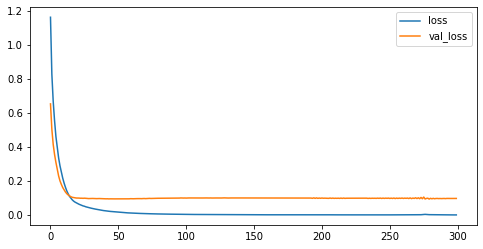

In [311]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.plot(figsize=(8,4))